<a href="https://colab.research.google.com/github/MinCiencia/Datos-COVID19/blob/master/DataObservatory_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Data Observatory logo" height="150px" src="http://dataobservatory.io/wp-content/themes/data-observatory-01/img/do-logo-web-01.png"  align="left" hspace="10px" vspace="0px"></p>

<h1 align="center">Bienvenido al jupyter notebook: ejemplos para ayudar a usar los datos publicados</h1>
<h4 align="center">Una contribución del Data Observatory</h4>


## **Para empezar**

Este documento te permite interactuar con los datos que se encuentran en el [repositorio](https://github.com/MinCiencia/Datos-COVID19) del [Ministerio de Ciencia, Tecnología, Conocimiento e Innovación](http://www.minciencia.gob.cl/COVID19). Estos datos son recopilados de las cifras oficiales publicadas por el [Ministerio de Salud](https://www.gob.cl/coronavirus/cifrasoficiales/#informes) sobre la pandemia del COVID-19 en Chile.

Este notebook es un ejemplo y puedes usarlo como base para generar tus propios gráficos y/o productos. Los datos publicados están en https://colab.research.google.com/github/MinCiencia/output/blob/master


# <h2>Para trabajar con los productos</h2>

Este notebook está escrito utilizando el lenguaje de programación [Python](https://www.python.org/about/) versión [3.x](https://www.python.org/download/releases/3.0/), cuya lectura se facilita a programadores no expertos. Cada bloque de ejecución está separado en distintas celdas, es necesario "ejecutar" cada una en secuencia haciendo click en botón "play" que aparece al posicionar el mouse sobre el recuadro [ ] al inicio de cada celda. Una vez que la celda se ejecuta, aparece un número que indica el órden en que se ha ejecutado.




Recomendamos ver los notebooks anteriores para utilizar algunas funciones útiles de python y las bibliotecas que hemos ido utilizando

Una manera comun de manipular los datos, es usando [pandas](https://pandas.pydata.org/). Para cargar uno de los archivos en un dataframe. También es necesario utilizar [numpy](https://numpy.org/) para los distintos cálculos

In [0]:
import numpy as np
import pandas as pd

**Nota:** Los datos están almacenados como tablas en formato csv. Algunas tablas están almacenadas por día. Es importante mantener el formato 'año-mes-día' (las comillas simples o dobles indican que es texto y no se ejecutará como una operación matemática)


# <h4>Graficar datos por región de varios días</h4>

En los notebook DataObservatory-ex1 se leyeron los datos totales del país en los que está el desgloce por región para una fecha dada. Ahora queremos ver el acumulado por cada región por un rango de fechas.

Primero establecemos la fecha de interés en la variable 'date' y la primera fecha ('first_date') es cuando se reportó el primer contagio en el país.

In [0]:
# el símbolo # al inicio de la línea nos indica que esto es un comentario, no se ejecuta con el código
# date indica la fecha de los datos que queremos utilizar

date = '2020-05-05'
first_date = '2020-03-03'

Contamos el rango de días

In [0]:
# contamos los días considerados con la siguiente instrucción
total_days = (pd.to_datetime(date)-pd.to_datetime(first_date)).days
total_days

63

Ahora leemos el archivo (tabla) dado en el producto 4 correpondiente a la fecha 'date'

In [0]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv",index_col=0)

Revisamos cuales son las columnas en este archivo

In [0]:
columnas = list(dataTotalRegion.columns.values)
columnas

['Casos  totales  acumulados',
 'Casos  nuevos  totales',
 'Casos  nuevos  con  sintomas',
 'Casos  nuevos  sin  sintomas*',
 'Fallecidos',
 '%  Total']

El nombre de las columnas ha variado durante el curso de las publicaciones del Ministerio de Salud debido a la complejidad de la enfermedad. Esto puede agregar complejidad para utilizar los datos. Aquí tratamos de cubrir una variedad de bases para que se pueda trabajar con los datos sin mayores inconvenientes.

Por ejemplo, revisamos las columnas del archivo csv del primer día:

In [0]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-03-03-CasosConfirmados-totalRegional.csv",index_col=0)


In [0]:
columnas = list(dataTotalRegion.columns.values)
columnas

[' Casos nuevos', ' Casos totales', ' Casos recuperados']

Se nota que las tablas ahora entregan mucha más información que las primeras.

Para converger ambos estilos, optamos por utilizar la secuencia de instrucciones:

1.   Declaramos nuevos dataFrames donde se asignaran las series de tiempo





In [0]:
# dataNew corresponde a los nuevos casos por día
# dataCum a los datos acumulados al día

dataNew = pd.DataFrame()
dataCum = pd.DataFrame()


2.   Utilizamos reglas para clasificar los datos que siguen la misma serie de tiempo. Por ejemplo, los 'Casos nuevos' a partir del 29 de abril se llaman 'Casos nuevos totales'. Y los 'Casos totales' se llaman 'Casos totales acumulados' a partir de esa misma fecha. 

También consideramos ciertos "typos" en los nombres, algunos tienen espacios intercalados. Por ello, la asignación en los nuevos dataFrames la planteamos de la siguiente manera:


In [0]:
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
 
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  dataTotalRegion_by_date = pd.read_csv(s,index_col=0)

  columnas = list(dataTotalRegion.columns.values)

  if "Casos  nuevos" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date['Casos  nuevos'].values
  elif 'Casos nuevos' in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date["Casos nuevos"].values
  elif " Casos nuevos" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date[" Casos nuevos"].values

  if "Casos  nuevos totales" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date['Casos  nuevos totales'].values
  elif 'Casos nuevos totales' in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date["Casos nuevos totales"].values
  elif " Casos nuevos totales" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date[" Casos nuevos totales"].values

  if "Casos  totales" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date['Casos  totales'].values
  elif 'Casos totales' in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date["Casos totales"].values
  elif " Casos totales" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date[" Casos totales"].values
 
  if "Casos  totales  acumulados" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date['Casos  totales  acumulados'].values
  elif 'Casos totales acumulados' in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date["Casos totales acumulados"].values

Antes de hacer el gráfico, preparamos las etiquetas a usar en la leyenda para que nos brinde mayor información. Queremos visualizar las regiones y el total de casos acumulados a la fecha escogida en la leyenda del gráfico

In [0]:
label_region = list()
temp = dataCum[date].values.tolist()
temp2 = dataTotalRegion.index.tolist()

for i in range(len(temp)):
  label_region.append(temp2[i]+' '+str(temp[i]))

Para hacer gráficos utilizamos matplotlib, con el estilo (opcional) 'fivethirtyeight'

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

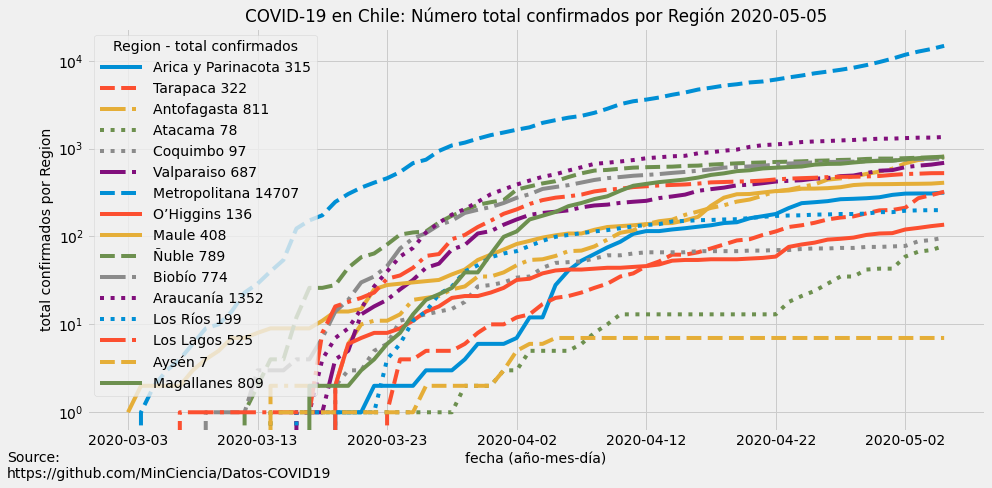

In [0]:
# Definimos el tipo de línea explícitamente ara evitar la duplicación de 
#  color/tipo de línea en las regiones

filename = date+'-COVID-19-Chile-TotalConfirmados-Region.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))
lsRegion = ['-','--','-.',':',':','-.','--','-','-','--','-.',':',':','-.','--','-']

for i in np.arange(len(dataCum.index)-1):
  dataCum.iloc[i].plot(ax=ax,ls=lsRegion[i])

plt.legend(fontsize='medium', labels=label_region, handlelength=3.0, title='Region - total confirmados')

ax.set_yscale('log')

ax.set_title(f'COVID-19 en Chile: Número total confirmados por Región '+date, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados por Region', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-20), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior
from google.colab import files
files.download(filename)

Estas son figuras básicas para trabajar con los productos del repositorio. La idea es que generes tus propios gráficos modificando las columnas, estilos, colores, etc. En los próximos notebooks encontrarás ejemplos para utilizar los datos que se encuentran disponibles en [https://github.com/MinCiencia/Datos-COVID19/tree/master/output](https://github.com/MinCiencia/Datos-COVID19/tree/master/output)